In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.ticker as ticker
import numpy as np


In [70]:
# Load data into DataFrame
df = pd.read_csv('/Users/sa21/Desktop/Data_Analyst_Job_Trends/data/cleaned_gsearch_jobs.csv')
df.head() 

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,...,state,has_pay_range,visa_sponsorship_flag,Full-time,Part-time,Contractor,Internship,Temp work,Per diem,Volunteer
0,data analyst,Meta,Anywhere,LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,15 hours ago,Full-time,True,...,Anywhere,False,0,1,0,0,0,0,0,0
1,data analyst,ATC,United States,LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,12 hours ago,Full-time,True,...,United States,False,1,1,0,0,0,0,0,0
2,aeronautical data analyst,"Garmin International, Inc.","Olathe, KS",Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,18 hours ago,Full-time,True,...,KS,False,0,1,0,0,0,0,0,0
3,data analyst,Upwork,Anywhere,Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,12 hours ago,Contractor,True,...,Anywhere,False,0,0,0,1,0,0,0,0
4,data analyst workforce management,Krispy Kreme,United States,LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,7 hours ago,Contractor,True,...,United States,False,0,0,0,1,0,0,0,0


In [37]:
columns_names = df.columns
print(columns_names)
print('All together there are', len(df.columns), 'columns')

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')
All together there are 27 columns


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   index                1000 non-null   int64  
 2   title                1000 non-null   object 
 3   company_name         1000 non-null   object 
 4   location             1000 non-null   object 
 5   via                  999 non-null    object 
 6   description          1000 non-null   object 
 7   extensions           1000 non-null   object 
 8   job_id               1000 non-null   object 
 9   thumbnail            635 non-null    object 
 10  posted_at            998 non-null    object 
 11  schedule_type        997 non-null    object 
 12  work_from_home       332 non-null    object 
 13  salary               92 non-null     object 
 14  search_term          1000 non-null   object 
 15  date_time            1000 non-null   ob

In [39]:
#numbers of rows
rows = len(df)
print('And there are', rows, 'rows')

And there are 1000 rows


In [40]:
# null values
df.isnull().sum()

Unnamed: 0                0
index                     0
title                     0
company_name              0
location                  0
via                       1
description               0
extensions                0
job_id                    0
thumbnail               365
posted_at                 2
schedule_type             3
work_from_home          668
salary                  908
search_term               0
date_time                 0
search_location           0
commute_time           1000
salary_pay              908
salary_rate             908
salary_avg              908
salary_min              910
salary_max              910
salary_hourly           946
salary_yearly           963
salary_standardized     908
description_tokens        0
dtype: int64

16 of 27 features have null values. 

In [41]:
# job titles
job_title_counts = df['title'].value_counts()
job_title_counts

title
Data Analyst                                   113
Senior Data Analyst                             56
Data Scientist                                   8
Data Analyst III                                 8
Business Data Analyst                            8
                                              ... 
Analyst , Data                                   1
AVP, Senior Data Analyst                         1
Director, Product/Data Analytics                 1
Financial and Data Analyst                       1
Technical Business Analyst (Backend & Data)      1
Name: count, Length: 597, dtype: int64

The words "Data" and "Analyst" are commonly found in most if not all the job postings.

In [42]:
#  names
company_counts = df['company_name'].value_counts()
top_15_company = company_counts.head(15)
top_15_company

company_name
Upwork                               66
Walmart                              64
vmysmartpros                         59
MYSMARTPROS                          17
Sam's Club                           13
Leidos                                9
Saint Louis County Clerks Office      8
Talentify.io                          8
Centene Corporation                   8
Discover Financial Services, Inc.     7
Lockton Companies                     6
CACI International                    6
UnitedHealth Group                    5
City of New York                      5
Snowflake                             5
Name: count, dtype: int64

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/4083707963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_company.values, y=top_15_company.index, palette='cividis')


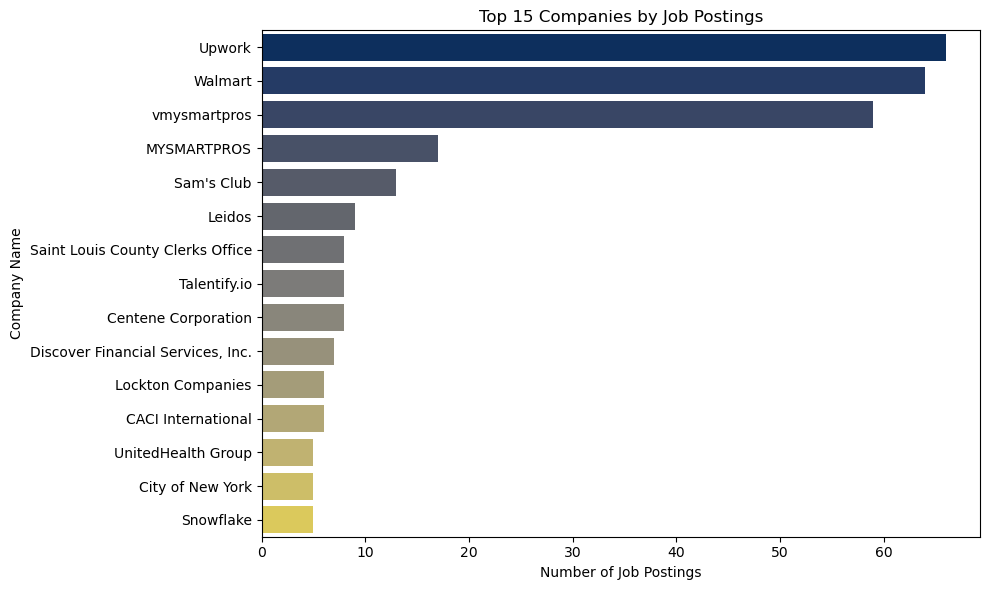

In [43]:
# Top 15 companies
top_15_company = company_counts.head(15)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_company.values, y=top_15_company.index, palette='cividis')
plt.title('Top 15 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

The graph shows that Upwork is the most active company in job postings. This could mean that freelance or gig-based roles or in high demand. Companies like Talentify.io and Walmart follow but with fewer postings. Other companies posted far less compare to the top 3. 

In [44]:
schedules_typ = df['schedule_type'].value_counts(dropna=False)
schedules_typ

schedule_type
Full-time                   858
Contractor                  109
Part-time                    28
NaN                           3
Internship                    1
Full-time and Internship      1
Name: count, dtype: int64

The schedule_type column shows that many job postings list multiple work schedule, such as "Full-time and Contractor" or "Part-time and Temp work." Full-time roles dominate the dataset, followed by Contractor and Contractor and Temp work combinations. This suggests that while single schedule listings are common, most postings offer hybrid or flexible options. To better understand the frequency of different work schedules,I'll visualize the top 40 most common combinations in a bar chart.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/2223986180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')


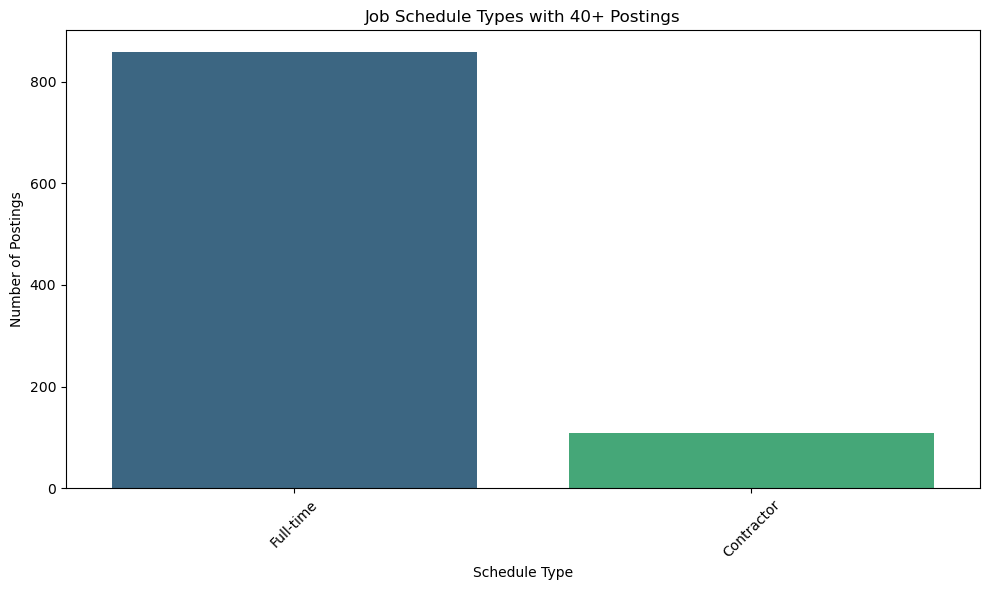

In [45]:
# Count values including NaNs being replaced with 'Missing' for plotting 
schedule_counts = df['schedule_type'].fillna('Missing').value_counts()

# Filter to only show types with 40 or more postings
filtered_counts = schedule_counts[schedule_counts >= 40]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')

plt.title('Job Schedule Types with 40+ Postings')
plt.xlabel('Schedule Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

#### Schedule type transformation

In [46]:
# Sample data
df['schedule_type'] = df['schedule_type'].fillna("")

# Standardize and normalize separators
df['schedule_type_clean'] = (
    df['schedule_type']
    .str.lower()
    .str.replace(r'\s*,\s*', ',', regex=True)
    .str.replace(r'\s+and\s+', ',', regex=True)
)
# Split into list and clean individual entries
def clean_label_list(lst):
    return [x.strip().removeprefix('and ').strip() for x in lst if x.strip()]

df['schedule_type_list'] = df['schedule_type_clean'].str.split(',')
df['schedule_type_list'] = df['schedule_type_list'].apply(clean_label_list)

# renaming to unify variations
rename_map = {
    'full time': 'full-time',
    'fulltime': 'full-time',
    'part time': 'part-time',
    'temp': 'temp work',
    'temporary': 'temp work'
}
df['schedule_type_list'] = df['schedule_type_list'].apply(
    lambda lst: [rename_map.get(x, x) for x in lst]
)

# One-hot encode schedule types
mlb = MultiLabelBinarizer()
schedule_dummies = pd.DataFrame(
    mlb.fit_transform(df['schedule_type_list']),
    columns=[f'is_{x.replace("-", "_").replace(" ", "_")}' for x in mlb.classes_],
    index=df.index
)
# Merge into original DataFrame
df = pd.concat([df, schedule_dummies], axis=1)


I used one-hot encoding to transform the schedule types like full-time or part-time into separate binary columns such as is_full_time. I used MultiLabelBinarizer because some job postings list multiple schedule types in a single row, and this tool helps break them out properly into different variables. I then merged them back into the original DataFrame. The result is a cleaner structure where each schedule type has its own column showing whether it's present in a given job posting. This allows me to get a clearer picture of the schedule types across all postings.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/1292140810.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_sums.values, y=schedule_labels, palette='mako')


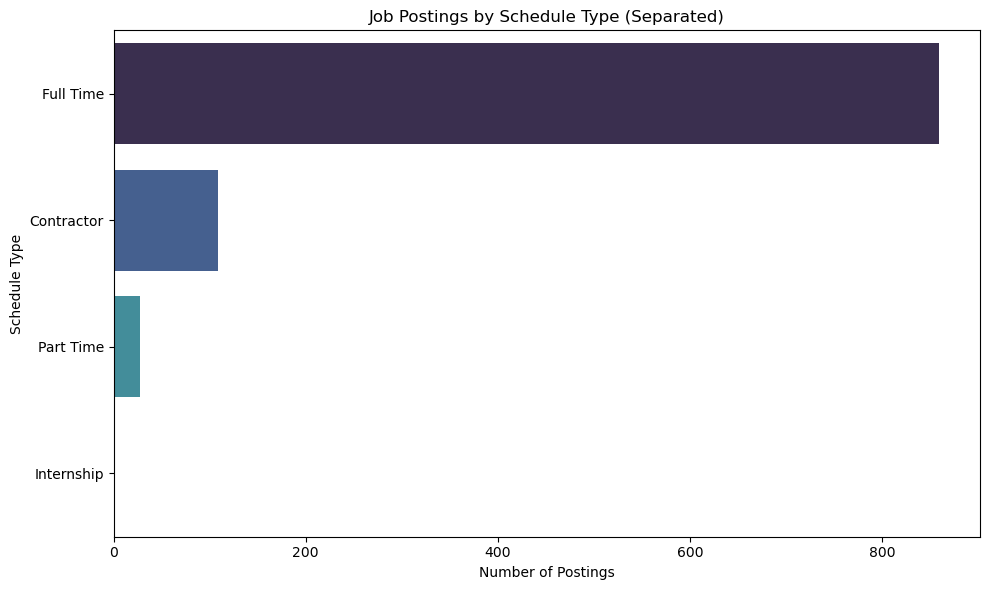

In [47]:
# Count each schedule type
schedule_columns = [col for col in df.columns if col.startswith('is_')]
schedule_sums = df[schedule_columns].sum().sort_values(ascending=False)
schedule_labels = schedule_sums.index.str.replace('is_', '').str.replace('_', ' ').str.title()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=schedule_sums.values, y=schedule_labels, palette='mako')
plt.title('Job Postings by Schedule Type (Separated)')
plt.xlabel('Number of Postings')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()


The frequency of job postings by schedule type after cleaning and standardizing the data. Many entries originally included multiple schedule types so I split and normalized them to count each type individually. Full-time roles are by far the most common, followed by contractor and temp work. Part-time, internship, and volunteer roles appear much less frequently.

In [48]:
# Create sets for top 3 types
set_full_time = set(df[df.get('is_full_time', 0) == 1].index)
set_contractor = set(df[df.get('is_contractor', 0) == 1].index)
set_temp = set(df[df.get('is_temp_work', 0) == 1].index)

# Plot Venn diagram
plt.figure(figsize=(6, 4))
venn3([set_full_time, set_contractor, set_temp],
      set_labels=('Full-time', 'Contractor', 'Temp Work'))
plt.title('Overlap of Top 3 Schedule Types')
plt.tight_layout()
plt.show()


KeyError: False

With the information gathered from the first bar plot, I created a Venn diagram to explore where the top schedule types; Full-time, Contractor, and Temp Work overlap. This visual helps uncover how often these job types are combined in single postings. For example, a number of postings offer both full-time and contractor roles, while some include all three categories. Understanding these overlaps help us identifying hybrid job opportunities and understand how flexible employers are with scheduling.

In [49]:
# Filter numerical and categorical columns
numer_features = df.select_dtypes(include=['int64', 'float64']).columns
numer_features

Index(['Unnamed: 0', 'index', 'commute_time', 'salary_avg', 'salary_min',
       'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized',
       'is_contractor', 'is_full_time', 'is_internship', 'is_part_time'],
      dtype='object')

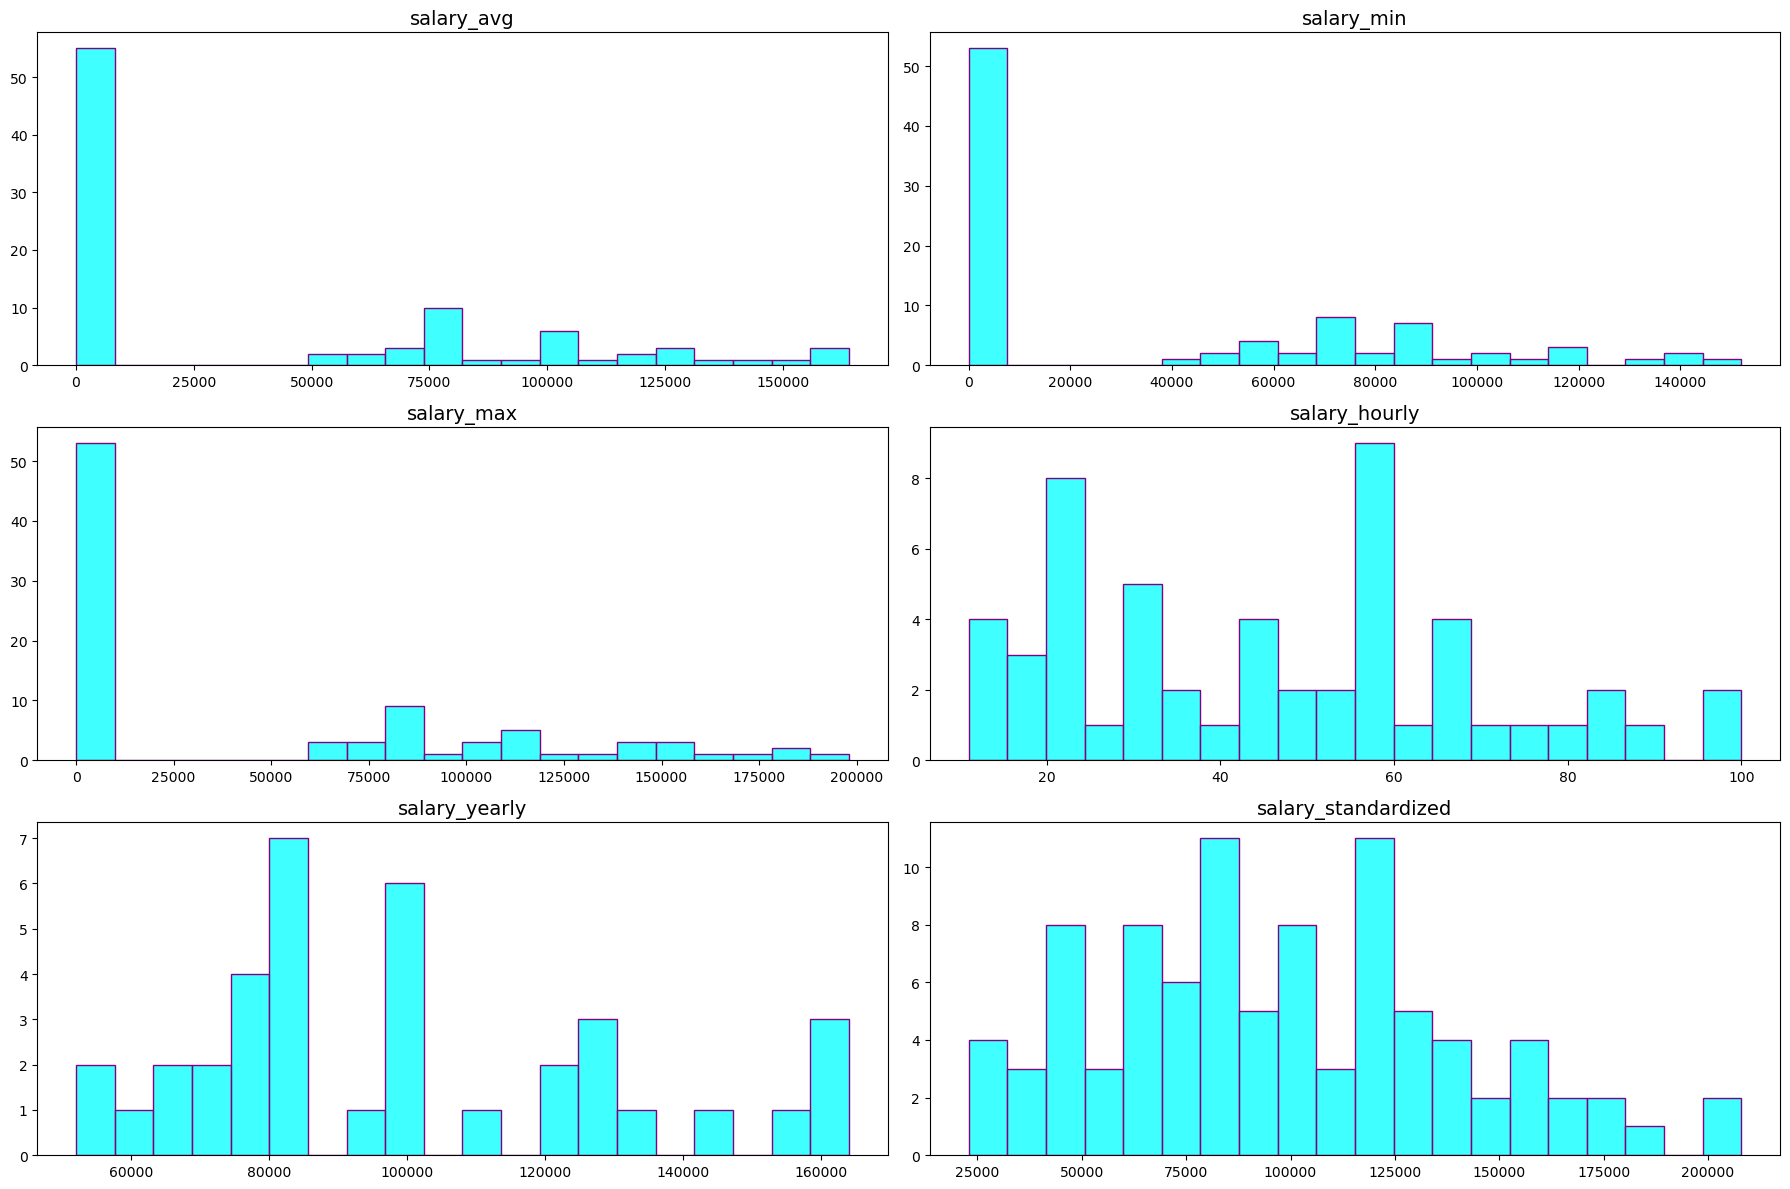

In [50]:
# exclude unwanted columns 
exclude_cols = ['Unnamed: 0', 'index', 'commute_time', 'is_', 'is_and_contractor', 
                'is_and_internship', 'is_and_per_diem', 'is_and_temp_work', 
                'is_contractor', 'is_full-time', 'is_internship', 'is_part-time', 
                'is_per_diem', 'is_temp_work', 'is_volunteer','is_full_time', 'is_part_time']

# Filter numerical features 
numer_features = [col for col in numer_features if col not in exclude_cols]
# Grid setup
n_cols = 2
n_rows = (len(numer_features) + 1) // n_cols  # Dynamic row calculation
plt.figure(figsize=(18, 12)) 

# Loop through and plot each numeric feature
for i, col in enumerate(numer_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=20, color='aqua', edgecolor='purple')
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Most of the salary features are right-skewed, with values concentrated on the lower end of the distribution and a long tail stretching toward higher salaries. This is especially noticeable in features like salary_avg, salary_min, and salary_max, where a small number of outliers inflate the upper range. While salary_standardized shows a slightly more compressed shape, it still maintains a right-skewed pattern rather than a true bell curve. 

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/1776535307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', palette='viridis')


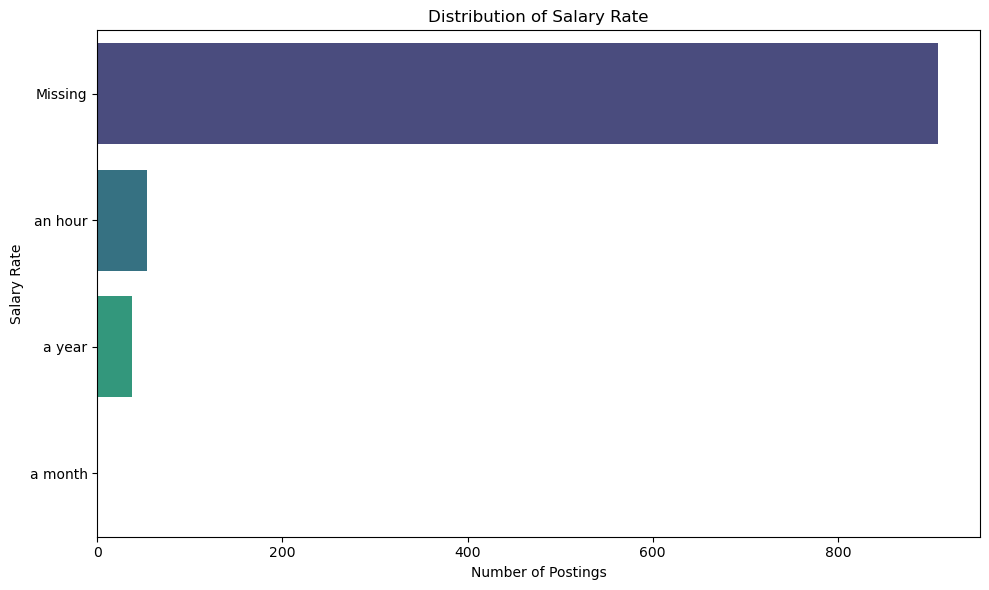

In [51]:
# Fill missing values in 'salary_rate' with 'Missing'
df['salary_rate'] = df['salary_rate'].fillna('Missing')

# Count the occurrences of each salary rate
salary_rate_counts = df['salary_rate'].value_counts().reset_index()
salary_rate_counts.columns = ['salary_rate', 'count']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', palette='viridis')
plt.title('Distribution of Salary Rate')
plt.xlabel('Number of Postings')
plt.ylabel('Salary Rate')
plt.tight_layout()
plt.show()

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/1016281132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_schedule.values, y=avg_salary_by_schedule.index, palette='coolwarm')


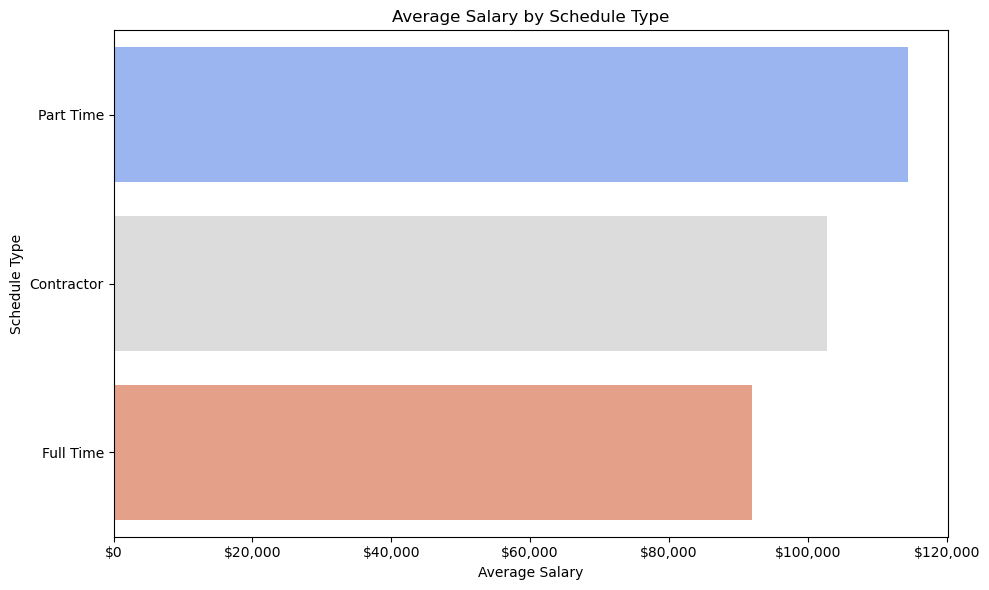

In [52]:
# Get one-hot schedule columns
schedule_columns = [col for col in df.columns if col.startswith('is_')]

# Compute average salary for each schedule type
avg_salary_by_schedule = {
    col.replace('is_', '').replace('_', ' ').title(): df.loc[df[col] == 1, 'salary_standardized'].mean()
    for col in schedule_columns
}
# Convert to pandas Series and drop NaN values
avg_salary_by_schedule = pd.Series(avg_salary_by_schedule).dropna().sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 6))
# Format x-axis to display currency
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
sns.barplot(x=avg_salary_by_schedule.values, y=avg_salary_by_schedule.index, palette='coolwarm')
plt.title('Average Salary by Schedule Type')
plt.xlabel('Average Salary')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()


As expected, full-time employees earn the highest average salaries, followed by contractors and temp workers. Full-time workers make nearly double the average salary of internship positions, highlighting the disparity in compensation based on employment type

### Clean and standardize the salary_pay column

In [54]:
#clean salary pay function
def clean_salary_pay(s):
    if pd.isna(s) or s == '':
        return np.nan

    # Convert to string and remove unwanted symbols
    s = str(s).replace('$', '').replace(',', '').lower()

    # Handle "K" notation (e.g., 90K)
    s = re.sub(r'(\d+)k', lambda m: str(float(m.group(1)) * 1000), s)

    # Split on common dash types
    parts = re.split(r'[\–\-]', s)  # en dash or hyphen

    try:
        # Convert both ends of range to float
        nums = [float(p.strip()) for p in parts if p.strip() != '']
        if len(nums) == 2:
            return sum(nums) / 2  # average
        elif len(nums) == 1:
            return nums[0]
    except:
        return np.nan

    return np.nan

# Apply function
df['salary_pay_cleaned'] = df['salary_pay'].apply(clean_salary_pay)

# fill NaNs with mean
df['salary_pay_cleaned'] = df['salary_pay_cleaned'].fillna(df['salary_pay_cleaned'].mean())
# Apply function
df['salary_pay_cleaned'] = df['salary_pay'].apply(clean_salary_pay)

# fill NaNs with mean
df['salary_pay_cleaned'] = df['salary_pay_cleaned'].fillna(df['salary_pay_cleaned'].mean())




This function helped me standardizes the messy salary_pay column by converting ranges "$50K–60K" into averaged numerical values and handles "K" notation for thousands. It cleans symbols, splits salary ranges like "50-60" into one number by taking the average, and imputes missing values with the mean. The result is an all numeric column.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/78646138.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette='coolwarm')


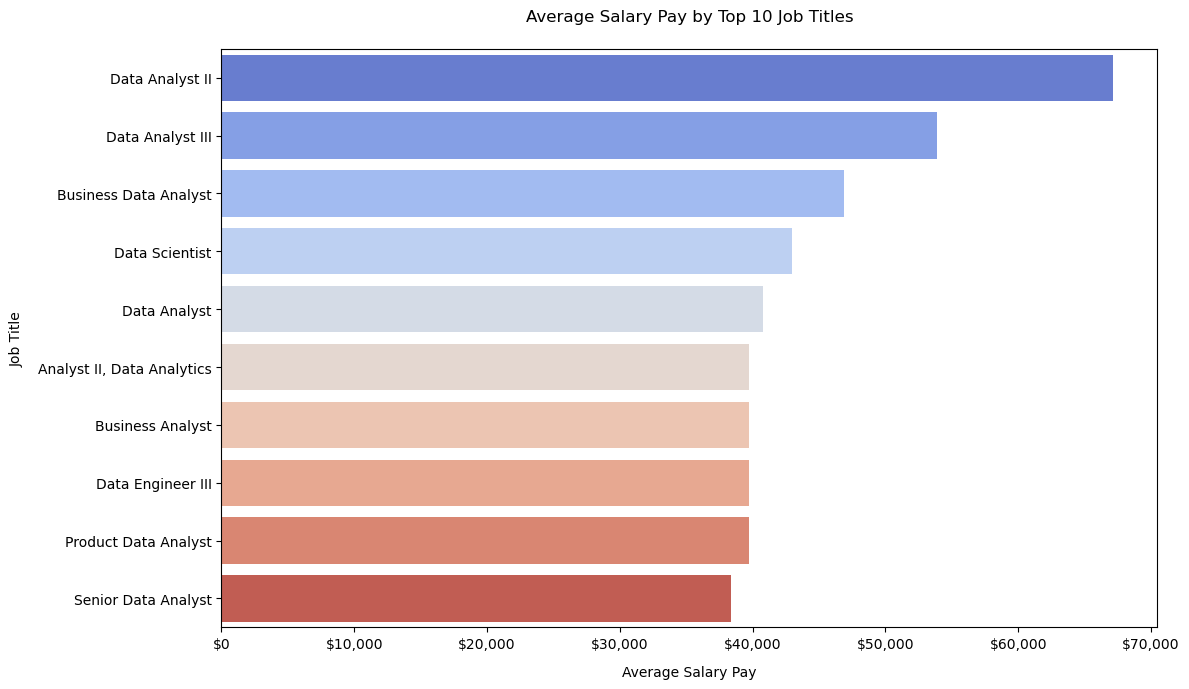

In [55]:
# Limit to top 10 most frequent job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_pay_cleaned by job title - FIXED GROUPBY
salary_by_title = df_top.groupby('title')['salary_pay_cleaned'].mean().sort_values(ascending=False)

# Plotting - FIXED BARPLOT PARAMETERS
plt.figure(figsize=(12, 7))
sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette='coolwarm')

# Format x-axis to display currency
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.title('Average Salary Pay by Top 10 Job Titles', pad=20)
plt.xlabel('Average Salary Pay', labelpad=10)
plt.ylabel('Job Title', labelpad=10)
plt.tight_layout()
plt.show()


The average salary pay across the top 10 job titles shows a narrow range. And roles like Data Analyst II, the pay is even closer. Data Engineer tops the list, but even the lowest ranked position Business Data Analyst is not far behind. This suggests a competitive and balanced compensation landscape.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/320494082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='salary_rate', order=df['salary_rate'].value_counts().index, palette='Set2')


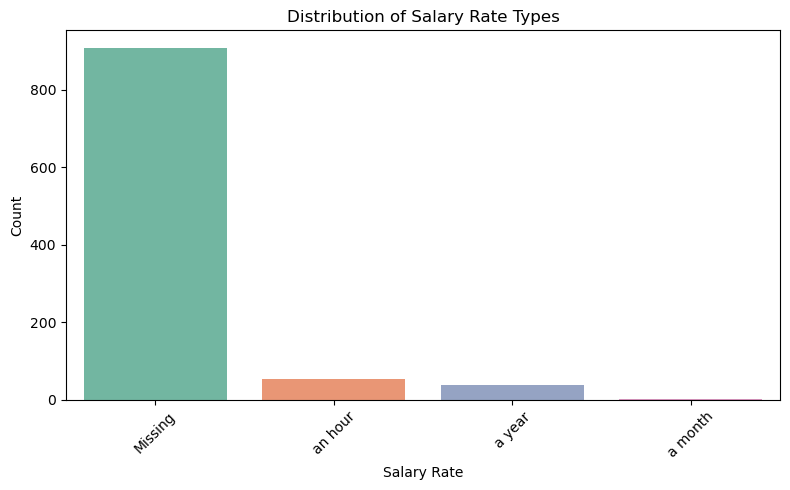

In [56]:
# Countplot of cleaned salary rate types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salary_rate', order=df['salary_rate'].value_counts().index, palette='Set2')
plt.title('Distribution of Salary Rate Types')
plt.xlabel('Salary Rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/2879436540.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['work_from_home'] = df['work_from_home'].fillna(False)
/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/2879436540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_remote.index.astype(str), y=avg_salary_remote.values, palette='pastel')


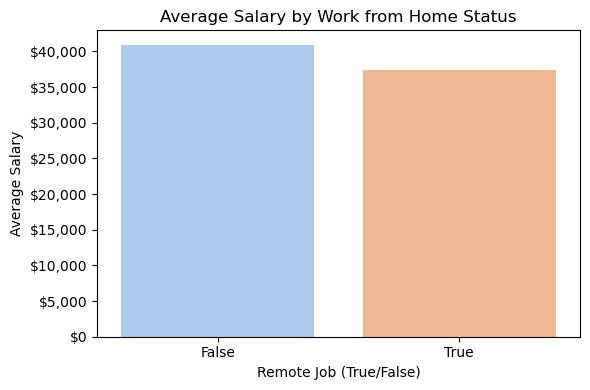

In [57]:
# Replace any NaNs in work_from_home with False or a neutral label
df['work_from_home'] = df['work_from_home'].fillna(False)

# Group and plot
avg_salary_remote = df.groupby('work_from_home')['salary_pay_cleaned'].mean().dropna()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_salary_remote.index.astype(str), y=avg_salary_remote.values, palette='pastel')
# Format x-axis to display currency
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.title('Average Salary by Work from Home Status')
plt.xlabel('Remote Job (True/False)')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()


Most job postings have a blank value for the work-from-home column, so I chose to fill the missing rows with False, assuming they represent non-remote positions. I then compared the average salary between remote (True) and non-remote (False) jobs. The results showed that the average salary for non-remote jobs is significantly higher. If this assumption is true, it would suggest that remote jobs tend to pay less on average than in-person roles.

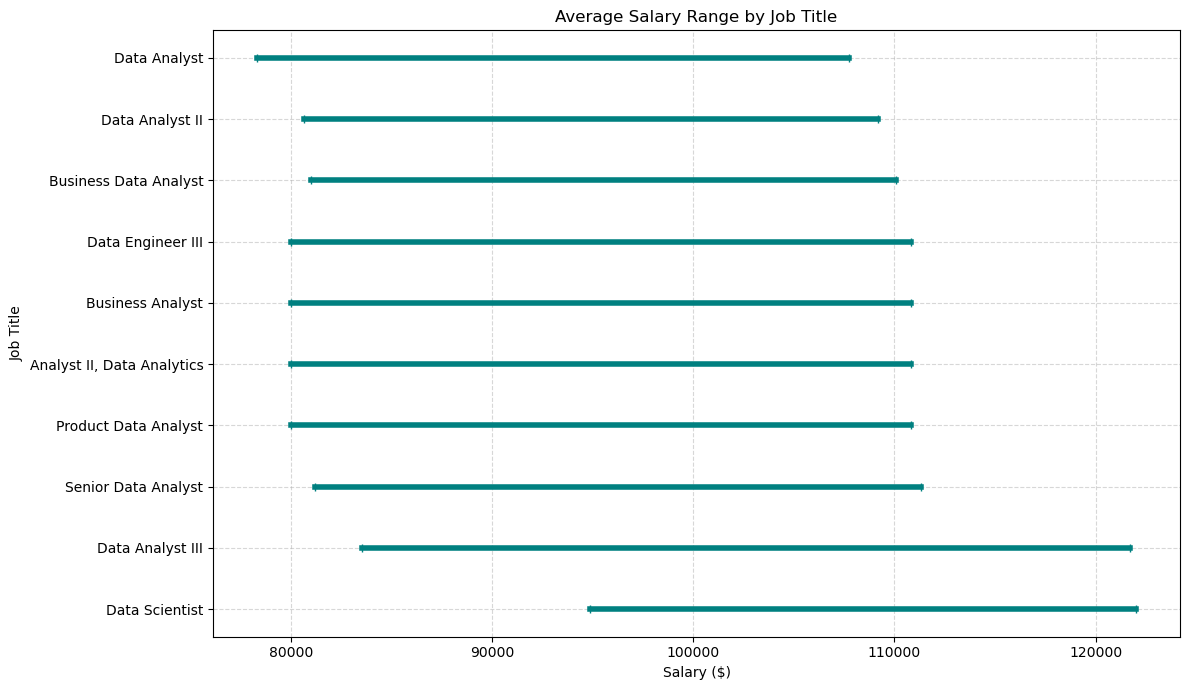

In [58]:
# Convert salary_rate to lowercase and strip whitespace
df['salary_rate_cleaned'] = df['salary_rate'].str.lower().str.strip()

# Convert salary_min and salary_max to numeric
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

# Convert hourly salaries to yearly
hourly_mask = df['salary_rate_cleaned'] == 'an hour'
df.loc[hourly_mask, 'salary_min'] = df.loc[hourly_mask, 'salary_min'] * 40 * 52
df.loc[hourly_mask, 'salary_max'] = df.loc[hourly_mask, 'salary_max'] * 40 * 52

# Fill NaNs with average values (optional)
df['salary_min'] = df['salary_min'].fillna(df['salary_min'].mean())
df['salary_max'] = df['salary_max'].fillna(df['salary_max'].mean())

# Limit to top job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_min and salary_max for each title
salary_range = df_top.groupby('title')[['salary_min', 'salary_max']].mean().sort_values(by='salary_max', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
for i, (index, row) in enumerate(salary_range.iterrows()):
    plt.plot([row['salary_min'], row['salary_max']], [index, index], marker='|', color='teal', linewidth=4)

plt.title('Average Salary Range by Job Title')
plt.xlabel('Salary ($)')
plt.ylabel('Job Title')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The salary ranges across different data-related job titles appear relatively consistent.

In [59]:
columns_names

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

#### Job Description NLP Feature Extraction


In [60]:
df['description']

0      In the intersection of compliance and analytic...
1      Job Title: Entry Level Business Analyst / Prod...
2      Overview:\n\nWe are seeking a full-time...\nAe...
3      Enthusiastic Data Analyst for processing sales...
4      Overview of Position\n\nThis position will be ...
                             ...                        
995    Ocean Bay, a subsidiary of Three Saints Bay, L...
996    2000 16th St, Denver, Colorado, 80202-5117, Un...
997    2000 16th St, Denver, Colorado, 80202-5117, Un...
998    2000 16th St, Denver, Colorado, 80202-5117, Un...
999    Systems Engineering Services is seeking a Tech...
Name: description, Length: 1000, dtype: object

In [61]:
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

df['description_cleaned'] = df['description'].apply(preprocess_text)
df['description_cleaned']

0      in the intersection of compliance and analytic...
1      job title: entry level business analyst / prod...
2      overview: we are seeking a full-time... aerona...
3      enthusiastic data analyst for processing sales...
4      overview of position this position will be the...
                             ...                        
995    ocean bay, a subsidiary of three saints bay, l...
996    2000 16th st, denver, colorado, 80202-5117, un...
997    2000 16th st, denver, colorado, 80202-5117, un...
998    2000 16th st, denver, colorado, 80202-5117, un...
999    systems engineering services is seeking a tech...
Name: description_cleaned, Length: 1000, dtype: object

In [ ]:
def extract_salary(text):
    match = re.search(r'\$?\d{2,3}(?:,\d{3})?(?: ?- ?\$?\d{2,3}(?:,\d{3})?)?', text)
    return match.group() if match else None

df['extracted_salary'] = df['description_cleaned'].apply(extract_salary)
df['extracted_salary'] 


In [ ]:
def extract_remote_status(text):
    if 'remote' in text or 'work from home' in text:
        return 'Remote'
    elif 'hybrid' in text:
        return 'Hybrid'
    elif any(kw in text for kw in [
        'on-site', 'on site', 'in-office', 'in office', 'in-person', 'in person',
        'must be on site', 'work from office', 'report to office',
        'office based', 'office setting', 'onsite presence required',
        'this is not a remote position', 'required to be physically present',
        'must be available on location'
    ]):
        return 'On-site'
    return None


df['remote_status_extracted'] = df['description_cleaned'].apply(extract_remote_status)
df['remote_status_extracted'].value_counts(dropna=False)


In [ ]:
def extract_degree(text):
    if 'phd' in text or 'doctoral' in text:
        return "PhD"
    elif 'master' in text or 'graduate degree' in text:
        return "Master's"
    elif 'bachelor' in text:
        return "Bachelor's"
    elif 'associate' in text:
        return "Associate"
    elif 'high school' in text or 'no degree' in text:
        return "None"
    return None

df['degree_required_extracted'] = df['description_cleaned'].apply(extract_degree)
df['degree_required_extracted'].value_counts(dropna=False)


In [ ]:
def extract_experience(text):
    if 'entry level' in text:
        return 'Entry-level'
    elif re.search(r'\b\d{1,2}[- ]?(plus|\+)? (years|yrs) (of )?(experience|exp)', text):
        return 'Experienced'
    elif 'senior' in text or 'lead role' in text:
        return 'Senior-level'
    return None

df['experience_level_extracted'] = df['description_cleaned'].apply(extract_experience)
df['experience_level_extracted'].value_counts(dropna=False)


In [ ]:
def extract_benefits(text):
    benefits = []
    if 'health insurance' in text:
        benefits.append('Health Insurance')
    if '401k' in text:
        benefits.append('401k')
    if 'bonus' in text:
        benefits.append('Bonus')
    if 'pto' in text or 'paid time off' in text:
        benefits.append('PTO')
    if 'stock' in text or 'equity' in text:
        benefits.append('Equity')
    return ', '.join(benefits) if benefits else None

df['benefits'] = df['description_cleaned'].apply(extract_benefits)
df['benefits'].value_counts(dropna=False)

In [ ]:
def extract_visa_info(text):
    if 'visa sponsorship' in text or 'sponsorship available' in text:
        return 'Sponsorship Available'
    elif 'must be authorized to work' in text:
        return 'No Sponsorship'
    return None

df['visa_sponsorship'] = df['description_cleaned'].apply(extract_visa_info)
df['visa_sponsorship'].value_counts(dropna=False)


In [ ]:
def extract_schedule(text):
    if 'full-time' in text or 'full time' in text:
        return 'Full-time'
    elif 'part-time' in text or 'part time' in text:
        return 'Part-time'
    elif 'contract' in text:
        return 'Contract'
    elif 'internship' in text:
        return 'Internship'
    return None

df['schedule_type_extracted'] = df['description_cleaned'].apply(extract_schedule)
df['schedule_type_extracted'].value_counts(dropna=False)

In [ ]:
 
df['travel_required'].value_counts(dropna=False)

In [ ]:
skills_list = [  'python', 'r', 'sql', 'excel', 'tableau', 'power bi', 'alteryx', 'looker', 
    'sas', 'spark', 'hadoop', 'aws', 'azure', 'gcp', 'bigquery', 'snowflake',
    'matplotlib', 'seaborn', 'plotly', 'dash',
    'scikit-learn', 'tensorflow', 'keras', 'pytorch',
    'numpy', 'pandas', 'statsmodels',
    'git', 'jira', 'bash', 'linux',
    'apache airflow', 'airflow',
    'etl', 'bi tools', 'data warehouse', 'data lake',
    'machine learning', 'deep learning', 'statistics', 'predictive modeling',
    'regression', 'clustering', 'nlp', 'natural language processing',
    'a/b testing', 'experimentation', 'data visualization']

def extract_skills(text):
    found = [skill for skill in skills_list if skill in text]
    return ', '.join(found) if found else None

df['skills_mentioned'] = df['description_cleaned'].apply(extract_skills)
df['skills_mentioned'].value_counts(dropna=False)

In [ ]:


# List of U.S. states and abbreviations
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

state_abbr = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN",
    "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV",
    "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN",
    "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"
]

# Combine all valid names/abbreviations
state_set = set(state_abbr + us_states)

def extract_state(text):
    if pd.isnull(text):
        return None
    words = re.findall(r'\b[A-Za-z]{2,}\b', text)
    for word in words:
        if word.upper() in state_set or word.title() in state_set:
            return word.upper() if word.upper() in state_abbr else word.title()
    return None

df['extracted_state'] = df['description_cleaned'].apply(extract_state)


In [68]:
# Show all rows in output
pd.set_option('display.max_rows', None)

# Now show all state counts
print(df['extracted_state'].value_counts())

extracted_state
IN              680
OR              111
ID               15
Colorado         14
HI               10
ME                9
MS                7
CA                7
VA                7
California        6
Illinois          6
Oklahoma          6
NY                6
NJ                6
Washington        6
FL                5
Missouri          5
AR                5
Texas             4
IL                4
CO                4
PA                4
MO                4
NC                3
WI                2
OH                2
NE                2
Ohio              2
Kansas            2
Florida           2
DC                2
Pennsylvania      2
MD                2
Arkansas          1
KS                1
IA                1
Virginia          1
Alaska            1
WA                1
LA                1
Utah              1
Georgia           1
Louisiana         1
AZ                1
TN                1
Oregon            1
Delaware          1
TX                1
Name: count, dtype: int6

In [ ]:
df.columns

In [62]:
# Load your CSV
df1 = pd.read_csv('/Users/sa21/Desktop/Data_Analyst_Job_Trends/data/cleaned_gsearch_jobs.csv')

# View all missing data counts
missing_data = df1.isnull().sum()
print(missing_data)




title           0
company_name    0
location        0
via             0
description     0
               ..
Contractor      0
Internship      0
Temp work       0
Per diem        0
Volunteer       0
Length: 76, dtype: int64


In [63]:
df1.head()

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,...,state,has_pay_range,visa_sponsorship_flag,Full-time,Part-time,Contractor,Internship,Temp work,Per diem,Volunteer
0,data analyst,Meta,Anywhere,LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,15 hours ago,Full-time,True,...,Anywhere,False,0,1,0,0,0,0,0,0
1,data analyst,ATC,United States,LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,12 hours ago,Full-time,True,...,United States,False,1,1,0,0,0,0,0,0
2,aeronautical data analyst,"Garmin International, Inc.","Olathe, KS",Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,18 hours ago,Full-time,True,...,KS,False,0,1,0,0,0,0,0,0
3,data analyst,Upwork,Anywhere,Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,12 hours ago,Contractor,True,...,Anywhere,False,0,0,0,1,0,0,0,0
4,data analyst workforce management,Krispy Kreme,United States,LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,7 hours ago,Contractor,True,...,United States,False,0,0,0,1,0,0,0,0


In [64]:
columns_names2 = df1.columns
columns_names2

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'posted_at', 'schedule_type', 'work_from_home', 'date_time',
       'salary_rate', 'salary_min', 'salary_max', 'salary_standardized',
       'description_tokens', 'date', 'Has_experience_requirement',
       'Has_degree_requirement', 'Python', 'R', 'SQL', 'Java', 'Scala',
       'Excel', 'Microsoft Excel', 'Tableau', 'Power BI', 'Looker',
       'Google Sheets', 'Matplotlib', 'Seaborn', 'Apache Airflow', 'dbt',
       'Apache NiFi', 'SSIS', 'Informatica', 'Talend', 'MySQL', 'PostgreSQL',
       'Oracle', 'Redshift', 'Snowflake', 'BigQuery', 'MongoDB', 'AWS',
       'Azure', 'GCP', 'Google Cloud Platform', 'Apache Spark', 'Hadoop',
       'Kafka', 'Hive', 'Presto', 'Docker', 'Kubernetes', 'Terraform', 'Git',
       'GitHub', 'Scikit-learn', 'TensorFlow', 'Keras', 'XGBoost', 'Pandas',
       'NumPy', 'skills_found', 'state', 'has_pay_range',
       'visa_sponsorship_flag', 'Full-time', 'Part-

In [77]:
import pandas as pd
import re

# Clean description column
df['description'] = df['description'].fillna('').astype(str)

# -------- 1. Identify AR/VR Tech Mentions -------- #
def is_augmented_reality(text):
    text = text.lower()
    return any(term in text for term in ["ar/vr", "augmented reality", "xr", "spatial computing"])

df['is_ar_tech'] = df['description'].apply(is_augmented_reality)

# -------- 2. Extract City & State Patterns -------- #
valid_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
    'DC'
}

# Ambiguous words that look like state codes
ambiguous_words = {"in", "or", "are", "ok", "me", "hi", "do", "la", "no", "us"}

def city_state(text):
    # Skip descriptions with known AR/VR terms
    if any(term in text.lower() for term in ["ar/vr", "augmented reality", "xr", "spatial computing"]):
        return []

    # Match "City, ST" where ST is uppercase only
    matches = re.findall(r'\b([A-Z][a-zA-Z\s]+),\s*([A-Z]{2})\b', text)

    clean_matches = []
    for city, state in matches:
        state = state.upper()
        city_clean = city.strip().title()
        
        # Filter out false positives from ambiguous lowercase words
        if state in valid_states and state.lower() not in ambiguous_words:
            clean_matches.append((city_clean, state))
    
    return clean_matches

df['location_data'] = df['description'].apply(city_state)
df['location_city'] = df['location_data'].apply(lambda x: x[0][0] if x else None)
df['location_state'] = df['location_data'].apply(lambda x: x[0][1] if x else None)

# -------- 3. Match Location Keywords -------- #
location_keywords = {
    "bay area": "CA", "silicon valley": "CA", "new york city": "NY", "manhattan": "NY", 
    "new york": "NY", "nyc": "NY", "tri-state": "NY", "los angeles": "CA", "seattle area": "WA", 
    "greater seattle": "WA", "dfw": "TX", "chicago area": "IL", "atlanta metro": "GA", 
    "boston area": "MA", "san francisco": "CA", "washington dc": "DC", "austin": "TX", 
    "houston": "TX", "dallas": "TX", "san antonio": "TX", "denver": "CO", "boulder": "CO", 
    "miami": "FL", "orlando": "FL", "phoenix": "AZ", "scottsdale": "AZ", "pittsburgh": "PA", 
    "san diego": "CA", "oakland": "CA", "sacramento": "CA", "raleigh": "NC", "charlotte": "NC", 
    "nashville": "TN", "columbus": "OH", "minneapolis": "MN", "st. paul": "MN", 
    "detroit": "MI", "indianapolis": "IN"
}

def find_region_keywords(text):
    text = text.lower()
    for keyword, state in location_keywords.items():
        if keyword in text:
            return keyword.title(), state
    return None, None

df[['region_keyword', 'region_state']] = df['description'].apply(lambda x: pd.Series(find_region_keywords(x)))

# -------- 4. Choose Final State -------- #
def choose_state(row):
    return row['location_state'] if pd.notnull(row['location_state']) else row['region_state']

df['state_result'] = df.apply(choose_state, axis=1)


In [78]:
job_counts = df['state_result'].value_counts().sort_values(ascending=False)


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_9794/2042991619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')


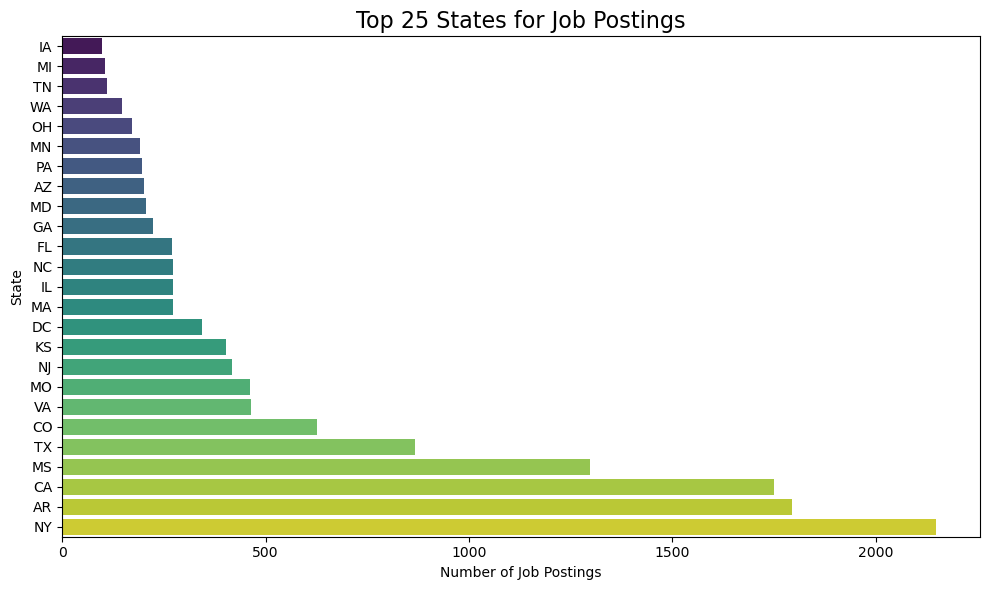

In [79]:
top_25_states = job_counts.head(25).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')
plt.title('Top 25 States for Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [80]:
print(df['state_result'].value_counts())

state_result
NY    2149
AR    1795
CA    1751
MS    1298
TX     867
CO     627
VA     465
MO     461
NJ     417
KS     404
DC     343
MA     273
IL     272
NC     272
FL     270
GA     223
MD     207
AZ     202
PA     197
MN     192
OH     172
WA     146
TN     110
MI     105
IA      99
WI      89
CT      61
UT      50
IN      43
AL      31
NM      27
DE      26
SC      26
RI      25
ID      25
SD      18
KY      18
NE      15
AK      14
WV      10
WY       9
NV       7
ND       6
NH       6
MT       3
VT       3
Name: count, dtype: int64


In [81]:
df['location_found'] = df['state_result'].apply(lambda x: 'Found' if pd.notnull(x) else 'Unknown')
print(df['location_found'].value_counts().to_string())

def classify_us_locations(row):
    if pd.notnull(row['state_result']):
        return row['state_result']
    elif row['location_found'] == 'Unknown':
        return 'US'
    else:
        return None

df['final_location'] = df.apply(classify_us_locations, axis= 1)
print(df['final_location'].value_counts().to_string())

location_found
Unknown    44946
Found      13829
final_location
US    44946
NY     2149
AR     1795
CA     1751
MS     1298
TX      867
CO      627
VA      465
MO      461
NJ      417
KS      404
DC      343
MA      273
IL      272
NC      272
FL      270
GA      223
MD      207
AZ      202
PA      197
MN      192
OH      172
WA      146
TN      110
MI      105
IA       99
WI       89
CT       61
UT       50
IN       43
AL       31
NM       27
DE       26
SC       26
RI       25
ID       25
KY       18
SD       18
NE       15
AK       14
WV       10
WY        9
NV        7
ND        6
NH        6
MT        3
VT        3


In [82]:
df['is_ar_tech'].value_counts()

is_ar_tech
False    58700
True        75
Name: count, dtype: int64